In [2]:
from pathlib import Path
import pandas as pd
import numpy as np

In [3]:
FOLD = 0

In [4]:
EXP_PATH = Path.cwd()
ROOT_DIR = EXP_PATH.parents[2]
exp_name = EXP_PATH.name
RAW_DATA_DIR = ROOT_DIR / 'data' / 'original_data'
DATA_DIR = ROOT_DIR / 'data' / 'kaggle_dataset' / 'irohith_tfrecords'
SAVE_DIR = ROOT_DIR / 'outputs' / exp_name / f'fold{FOLD}'
SAVE_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
oof_df = pd.read_csv(SAVE_DIR / 'oof_df.csv')

<Axes: ylabel='Frequency'>

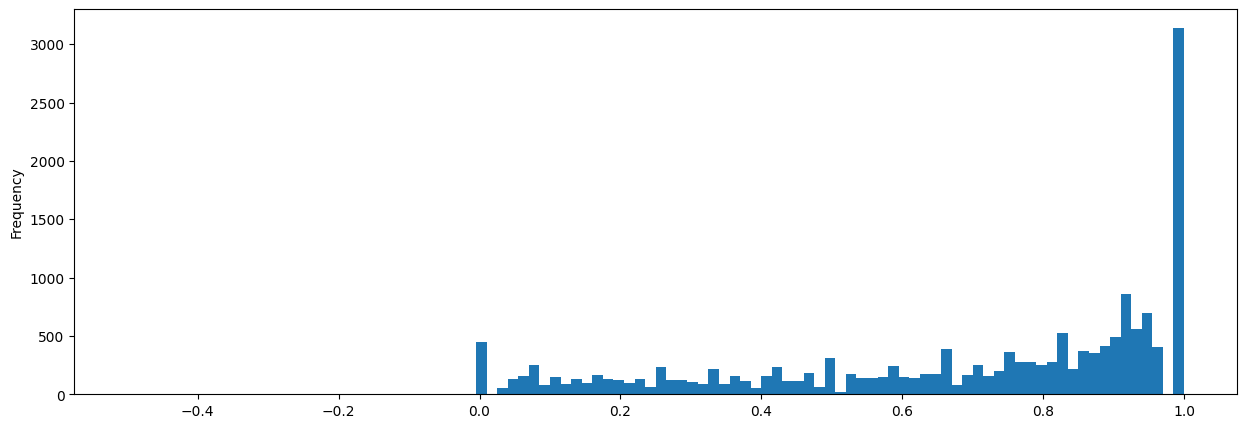

In [6]:
# oof_df['score'].plot(kind='hist', bins=np.linspace(0.65, 0.99, 50), figsize=(15, 5))
oof_df['score'].plot(kind='hist', bins=100, figsize=(15, 5))

In [ ]:
oof_df

In [8]:
oof_df.query('score == 0.')

,sequence_id,phrase,pred,score,fold
2,1494472407,+62-879-37-82,/enhi,0.0,0
102,1497994495,505-619-6215,,0.0,0
128,1498669871,www.xljiewu.com,,0.0,0
204,1501217715,799-771-2855,bo,0.0,0
219,1501739885,+247-79-379-34,10,0.0,0
...,...,...,...,...,...
16848,1970043644,+593-789-204-010-10961,s,0.0,0
16861,1970573434,www.hzblkzsgc.com/shoseki,,0.0,0
16877,1971077049,565-016-4062,,0.0,0
16971,1974214464,3251 finus cherry,w,0.0,0
